# Plotting Utility Functions for BB-Player

In [7]:
# necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# read in balance csv
df_import = pd.read_csv('running_balance_OLD.csv')

# set strategy names
names = [
    "bb",
    "random",
    "hi_lo",
    "ko",
    "zen",
    "ten",
    "halves",
    "uston"
]

In [9]:
# a selective plotting function (by chosen subset of data)
def plot_running_balance(df_balance: pd.DataFrame, names: list[str], min_index: int, max_index: int) -> None:
    # set up plot
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)

    # threshold line
    ax.axhline(1.0, linestyle='--', color='black')

    # plot selected outcomes for all strategies
    for name in names:
        df_balance[name][min_index:max_index].plot(ax=ax, label=name, alpha=0.5, linewidth=1.5)
    
    # configure main plot for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    # add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(names) + 1)
    
    # make the plot a bit more readable
    ax.set_title('Running Balance Multiplier over Epoch', fontweight='bold')
    ax.set_xlabel('Game')
    ax.set_ylabel('Balance Multiplier (units per. base balance)')
    # define xticks separation
    separation = 20
    tick_factor = int(np.floor(max_index - min_index) / separation)
    ax.set_xticks(np.linspace(min_index, max_index, tick_factor))
    # and some stylistic choices
    ax.margins(x=0.025)
    
    # show final plot
    plt.show()

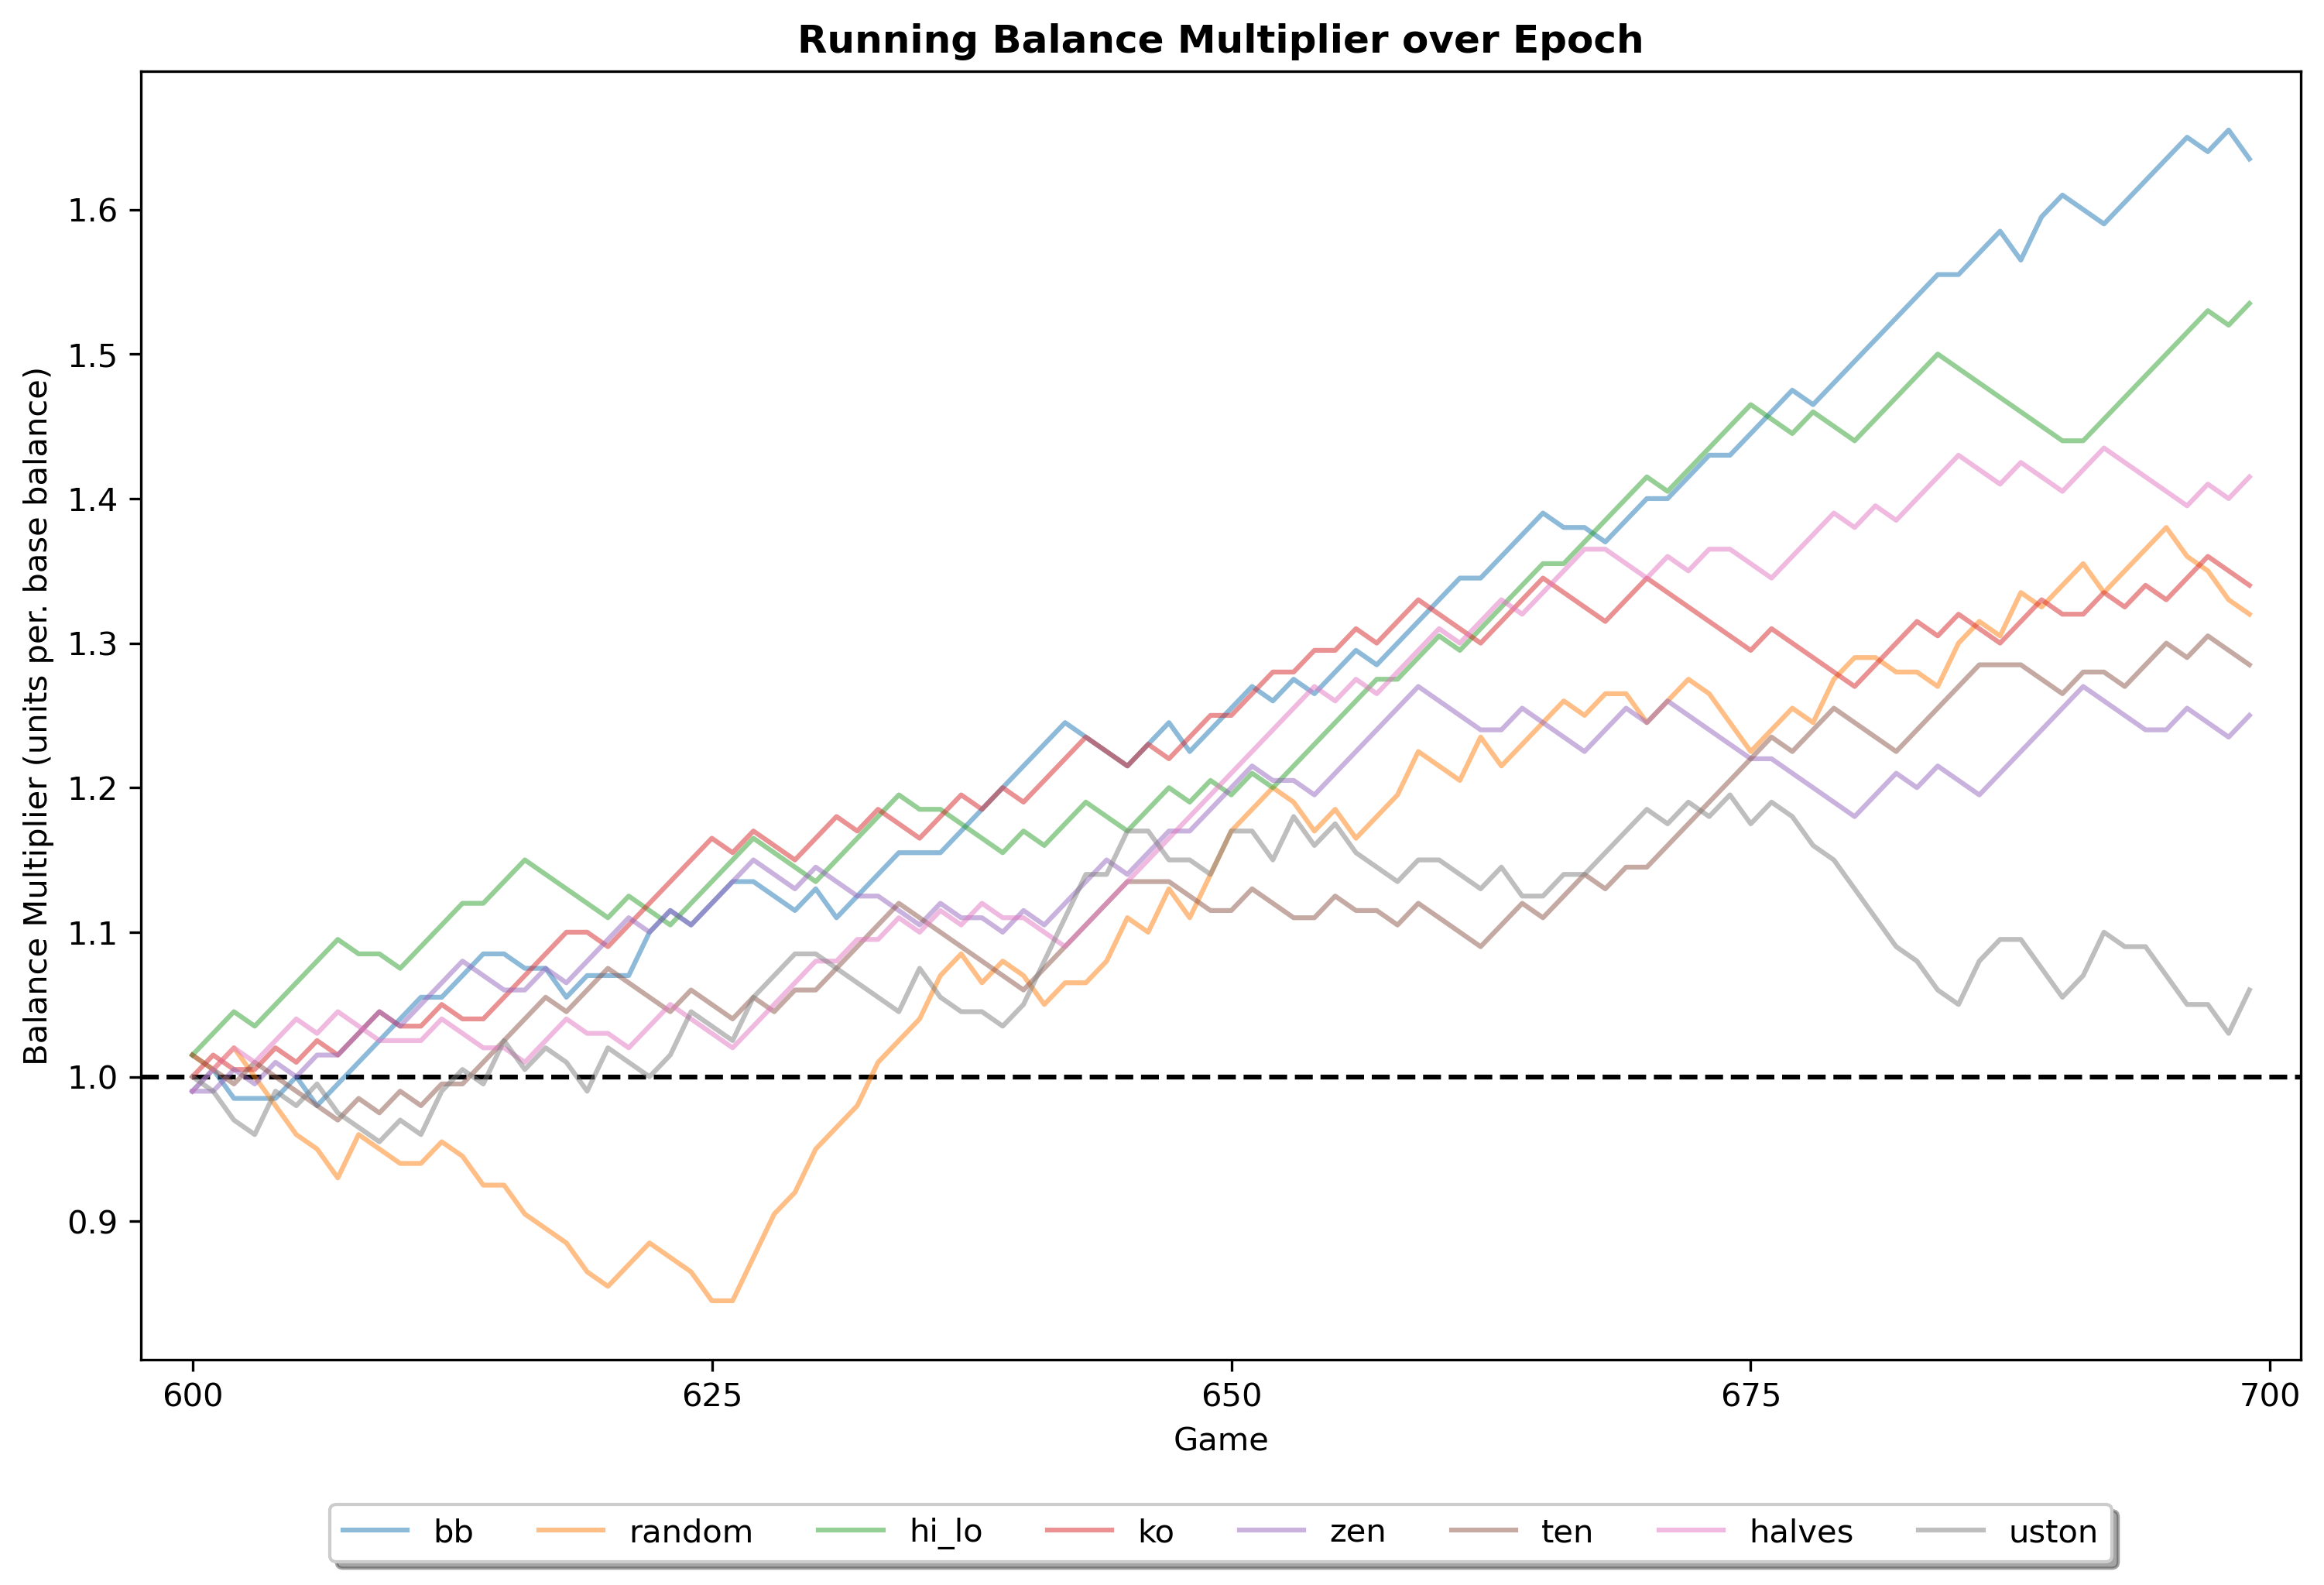

In [10]:
# plot the subset of data in epoch #7
plot_running_balance(df_import, names, 600, 700)